In [1]:
from glob import glob
import os
import pandas as pd
import numpy as np
import torch

import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [2]:
datapath = '../../data/interim'
data = os.path.join(datapath, 'original_streamflow.csv')

finalpath = '../../data/final/results'

In [3]:
df = pd.read_csv(data, index_col='Date')

In [4]:
df.head().T

Date,1988-10-01,1988-10-02,1988-10-03,1988-10-04,1988-10-05
11200800,0.00,0.00,0.00,0.00,0.00
11208000,4.30,4.10,4.00,3.90,3.40
11216200,3.80,3.80,3.80,3.80,3.80
11224500,0.00,0.00,0.00,0.00,0.00
11237500,0.12,0.15,0.15,0.12,0.12
11238600,NaN,NaN,NaN,NaN,NaN
11244000,0.26,0.26,0.27,0.27,0.26
11246500,1.10,1.10,1.10,1.10,1.10
11253310,0.00,0.00,0.00,0.00,0.00
11274500,0.00,0.00,0.00,0.00,0.00


In [5]:
criterion = torch.nn.SmoothL1Loss(reduction='sum')

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
glob(os.path.join(finalpath, '*.csv'))

['../../data/final/results/5_[16]_log_prediction.csv',
 '../../data/final/results/5_[4]_log_prediction.csv',
 '../../data/final/results/5_[32]_sqrt_prediction.csv',
 '../../data/final/results/5_[4, 2]_sqrt_prediction.csv',
 '../../data/final/results/5_[2]_log_prediction.csv',
 '../../data/final/results/5_[8]_sqrt_prediction.csv',
 '../../data/final/results/5_[32, 16]_sqrt_prediction.csv',
 '../../data/final/results/5_[2]_sqrt_prediction.csv',
 '../../data/final/results/5_[16]_sqrt_prediction.csv',
 '../../data/final/results/5_[8]_log_prediction.csv',
 '../../data/final/results/1_[16]_sqrt_prediction.csv',
 '../../data/final/results/9_[16]_sqrt_prediction.csv',
 '../../data/final/results/9_[16]_log_prediction.csv',
 '../../data/final/results/5_[16, 8]_sqrt_prediction.csv',
 '../../data/final/results/5_[8, 4]_sqrt_prediction.csv',
 '../../data/final/results/5_[4]_sqrt_prediction.csv',
 '../../data/final/results/11_[16]_log_prediction.csv',
 '../../data/final/results/3_[16]_sqrt_predictio

In [8]:
results = {}
optimal_pred = pd.DataFrame(columns = df.columns, index = df.index)
losses = {c: [None, np.inf] for c in df.columns}
for pred in glob(os.path.join(finalpath, '*.csv')):
    prediction = pd.read_csv(pred, index_col = 'Date')
    for s in df.columns:
        tmp_df = pd.DataFrame({'true': df[s], 
                       'pred':prediction[s]})
        tmp_df = tmp_df[~tmp_df.true.isnull()]
        tmp_df = tmp_df[tmp_df.true.round() != 0]
        loss = np.sqrt(criterion(torch.tensor(tmp_df.true.values), torch.tensor(tmp_df.pred.values)).item())
        if loss < losses[s][1]:
            losses[s] = [pred.split('/')[-1][:-15], loss]
            optimal_pred[s] = prediction[s]

In [9]:
losses

{'11200800': ['9_[16]_sqrt', 385.9708294097185],
 '11208000': ['5_[8]_sqrt', 630.751685038473],
 '11216200': ['7_[16]_log', 786.6717676662682],
 '11224500': ['7_[16]_sqrt', 210.15335082945515],
 '11237500': ['5_[4, 2]_sqrt', 511.93006537750614],
 '11238600': ['7_[16]_sqrt', 1649.2043070439304],
 '11244000': ['5_[4]_sqrt', 464.9904945149012],
 '11246500': ['5_[8]_sqrt', 612.3051447807849],
 '11253310': ['5_[4]_log', 147.10498352974918],
 '11274500': ['5_[16]_sqrt', 371.0726875790451],
 '11274630': ['5_[16]_sqrt', 234.80738042527807],
 '11277300': ['5_[4]_log', 807.1809234464129],
 '11278000': ['3_[16]_sqrt', 1001.5851685971344],
 '11284400': ['11_[16]_sqrt', 255.63035172158152],
 '11298000': ['5_[16]_sqrt', 745.756737382758],
 '11299600': ['5_[16]_sqrt', 243.57599683626586],
 '11315000': ['5_[16]_sqrt', 580.2503854151361],
 '11316800': ['5_[2]_log', 345.05112022203053],
 '11379500': ['5_[16]_sqrt', 733.5810167260654],
 '11396200': ['5_[16]_sqrt', 888.2789657937975],
 '11416500': ['5_[4,

In [10]:
df.index = pd.to_datetime(df.index)
optimal_pred.index = pd.to_datetime(optimal_pred.index)

In [16]:
df.index.max()

Timestamp('2019-09-30 00:00:00')

11200800


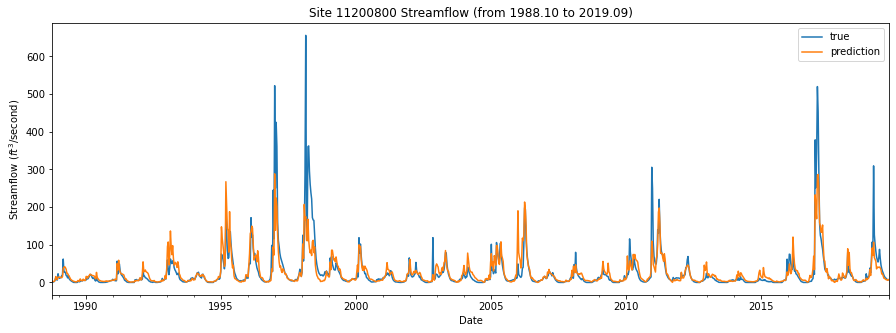

11208000


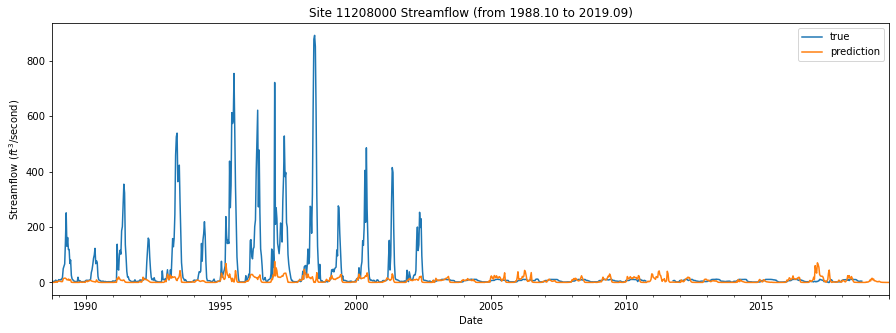

11216200


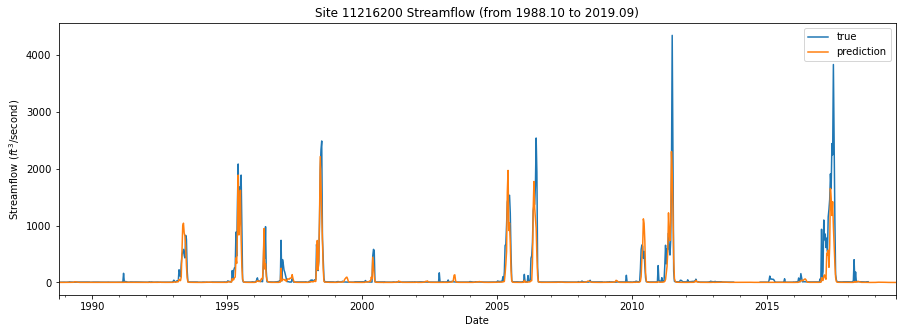

11224500


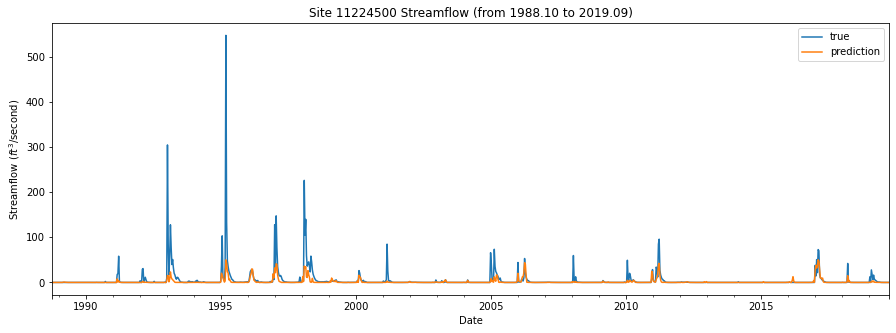

11237500


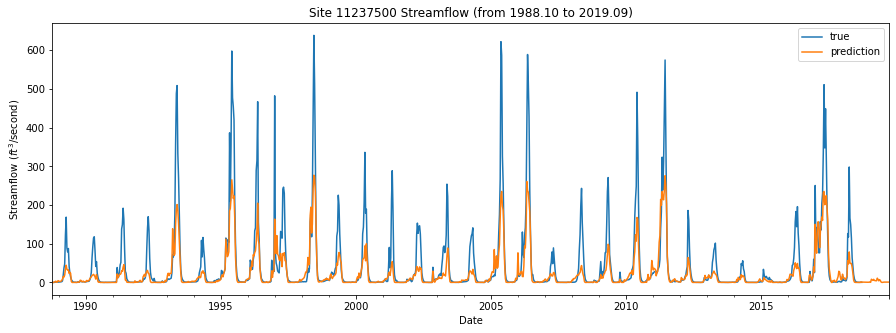

11238600


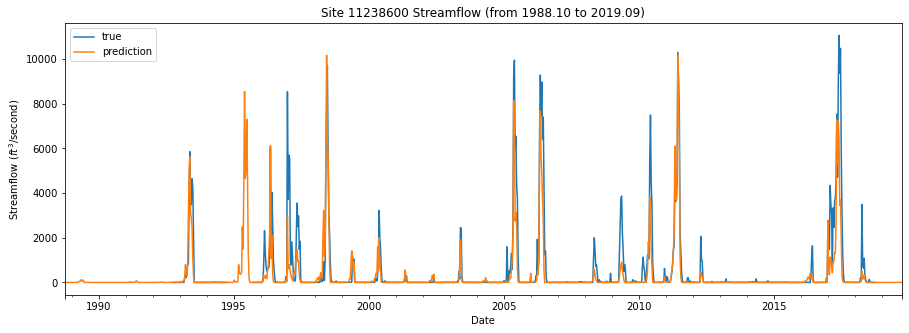

11244000


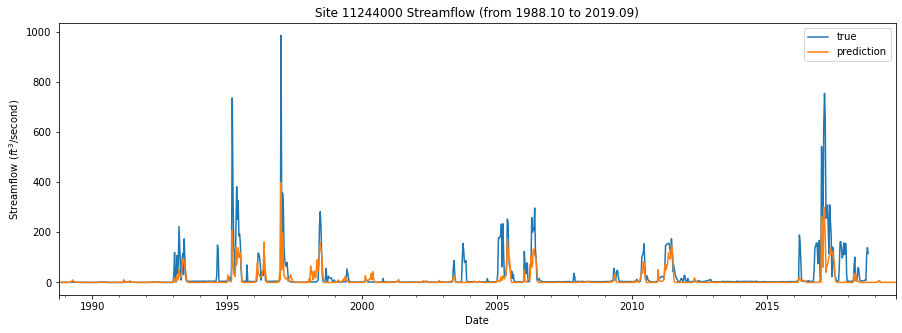

11246500


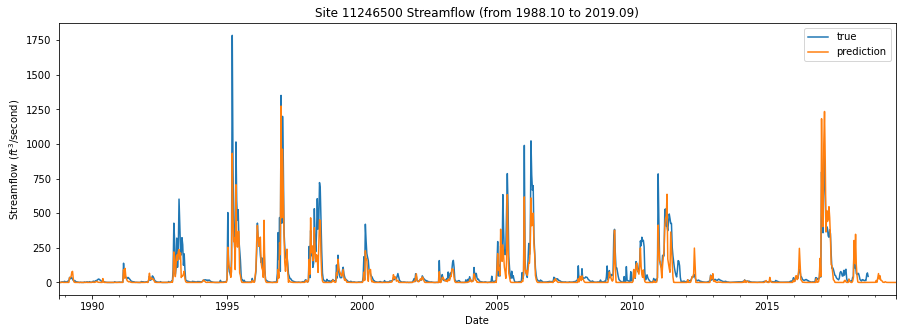

11253310


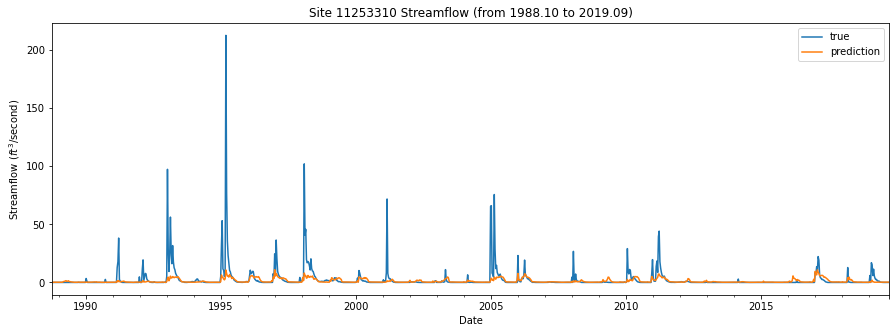

11274500


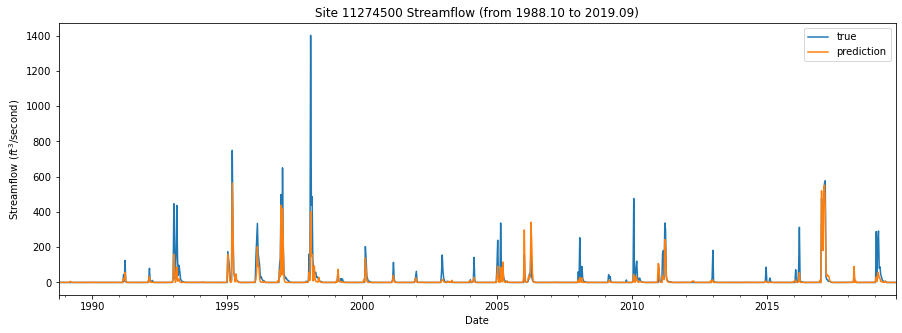

11274630


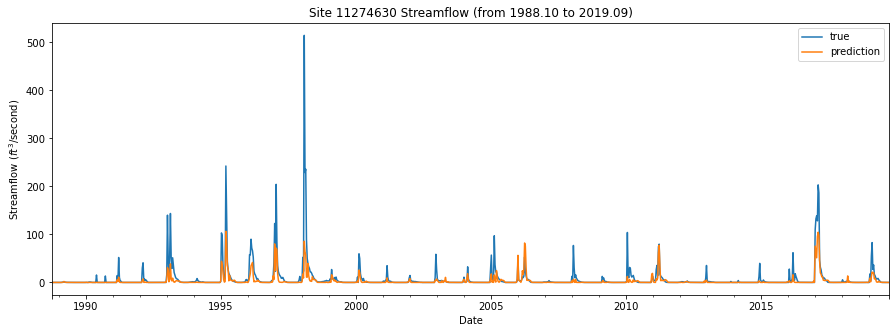

11277300


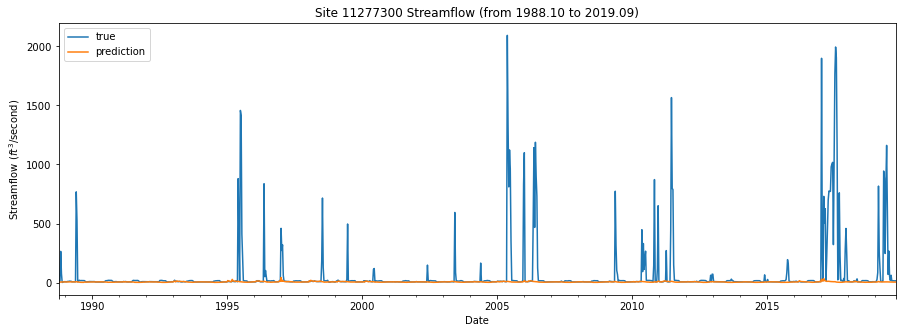

11278000


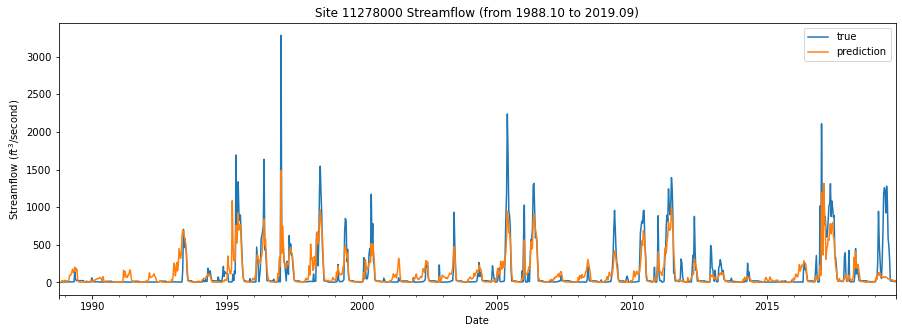

11284400


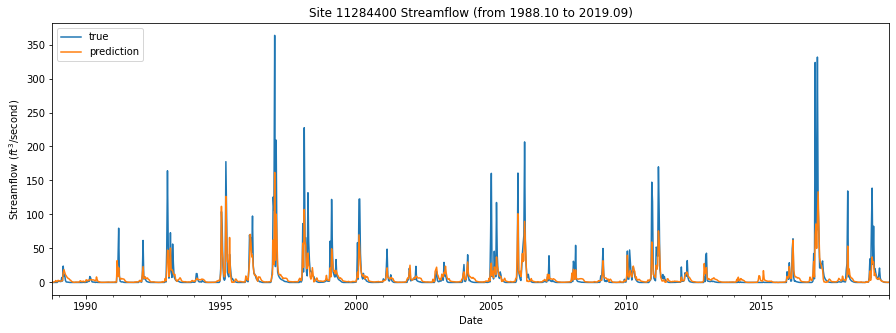

11298000


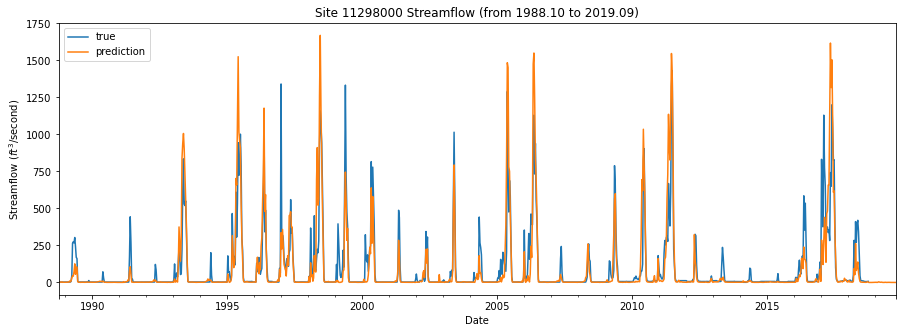

11299600


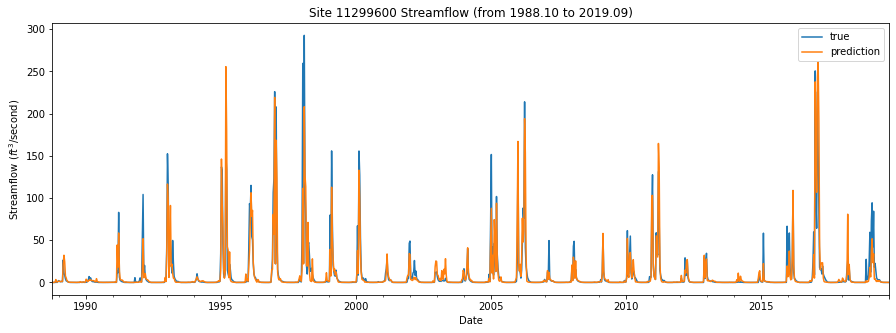

11315000


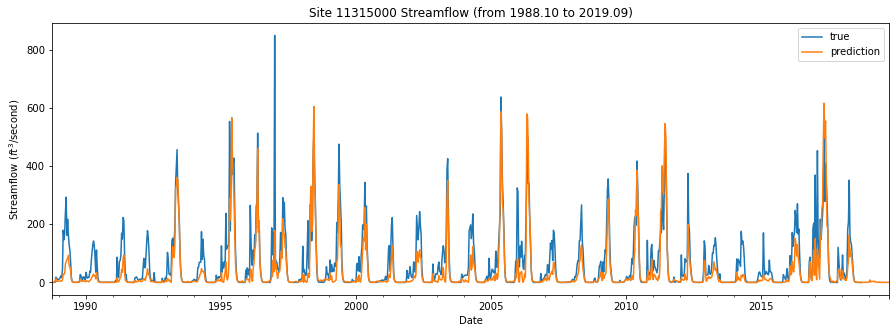

11316800


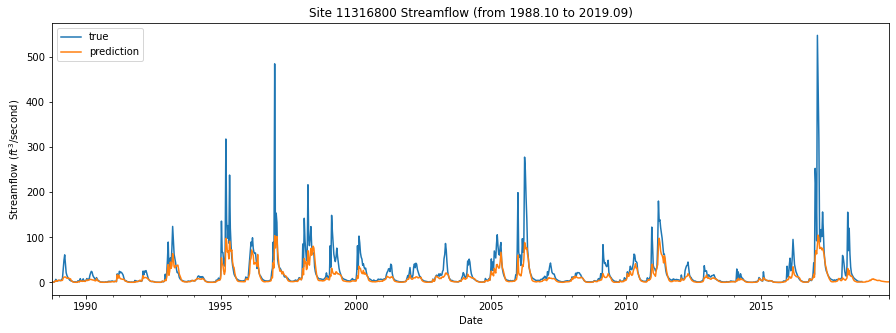

11379500


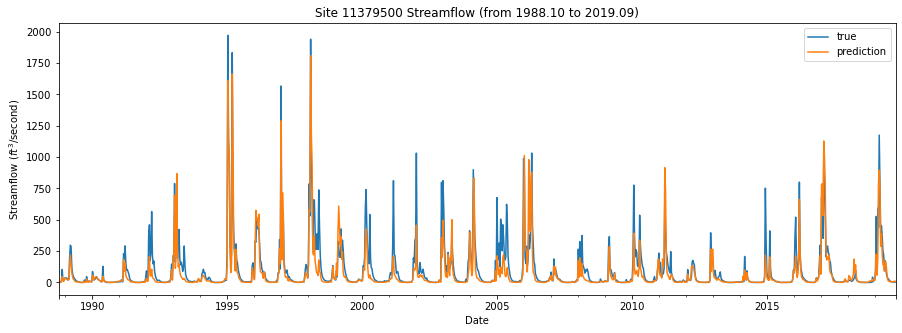

11396200


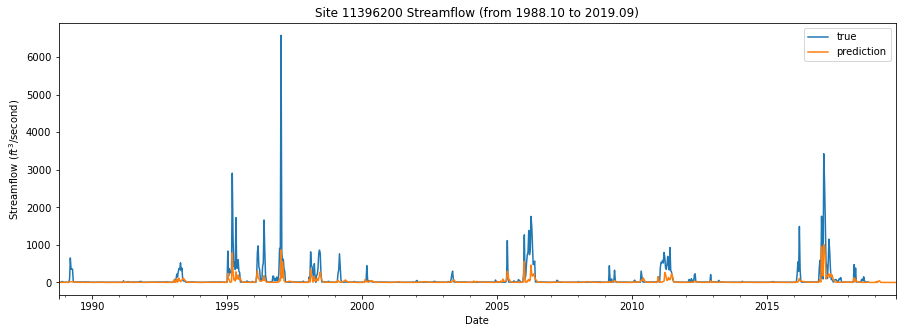

11416500


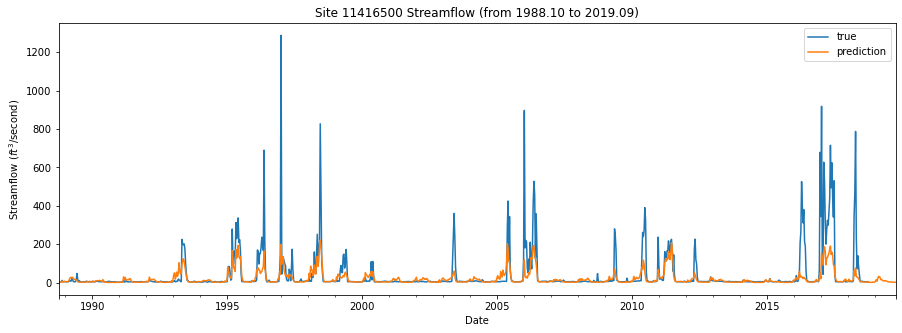

11418500


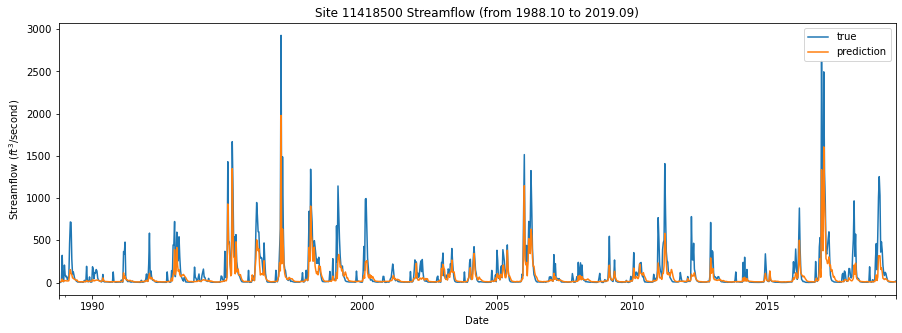

11427700


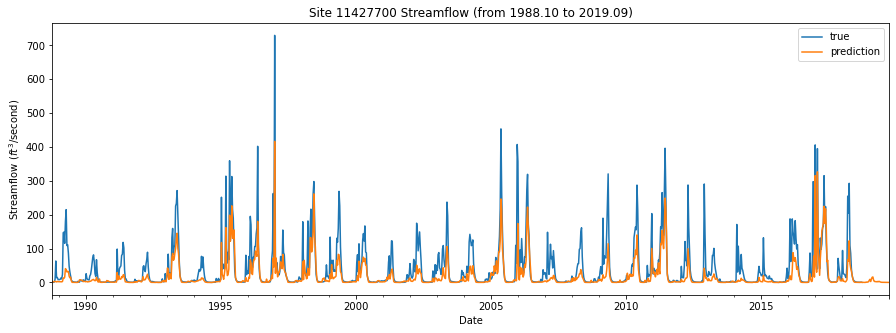

11427750


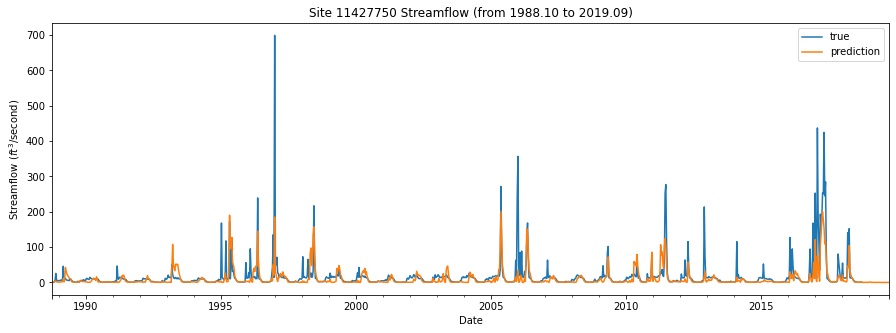

11436000


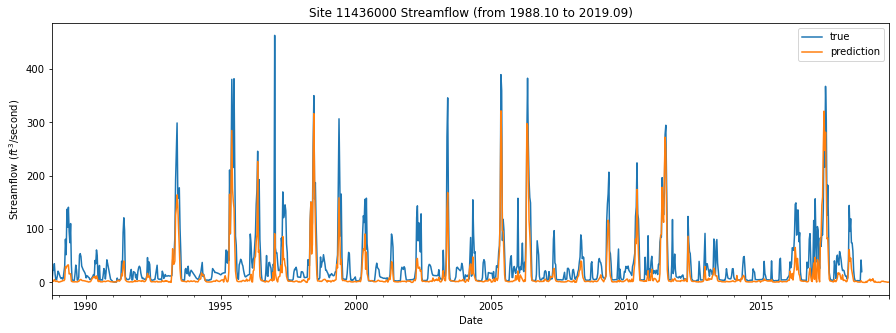

11449500


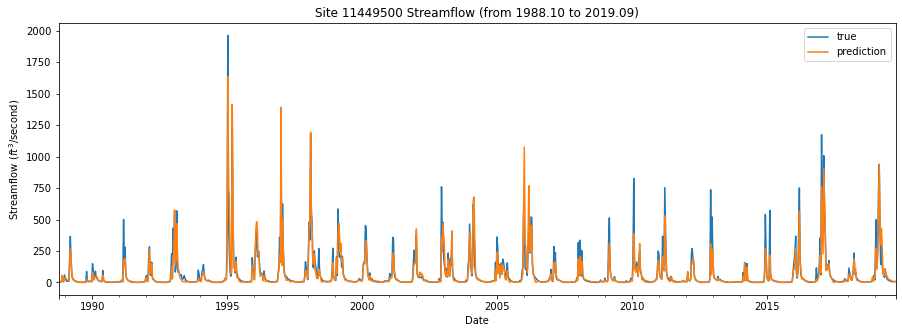

11451000


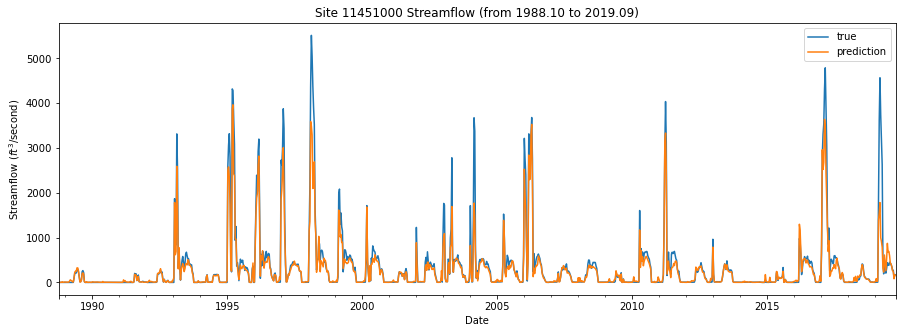

11451100


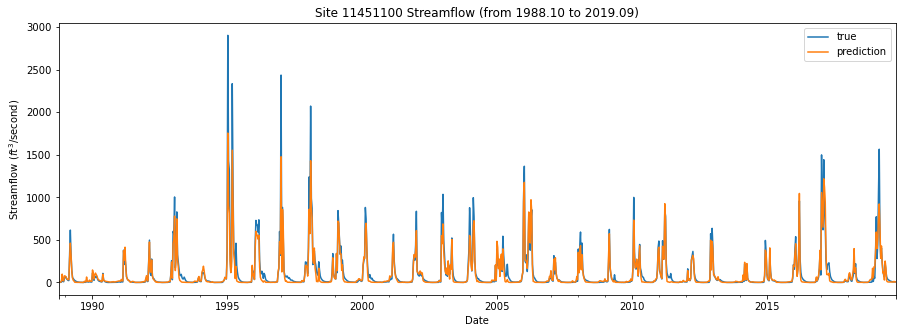

In [22]:
for s in optimal_pred.columns:
    print(s)
    df[s].resample('10d').mean().plot(label = 'true')
    optimal_pred[s].resample('10d').mean().plot(label = 'prediction')
    
    plt.ylabel(r'Streamflow ($ft^3$/second)')
    plt.title(f'Site {s} Streamflow (from 1988.10 to 2019.09)')
    plt.legend()
    plt.show()

In [9]:
optimal_pred.to_csv('./data/final/optimial_ae_pred.csv')

In [10]:
filled_data = df.fillna(optimal_pred)

In [11]:
filled_data.to_csv('./data/final/filled_streamflow.csv')

site no: 11208000


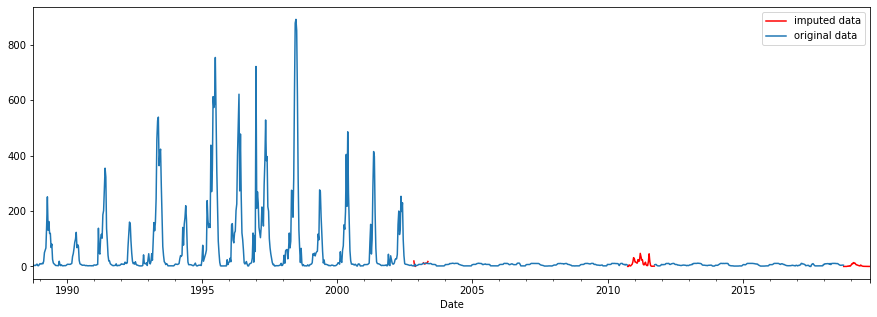

site no: 11216200


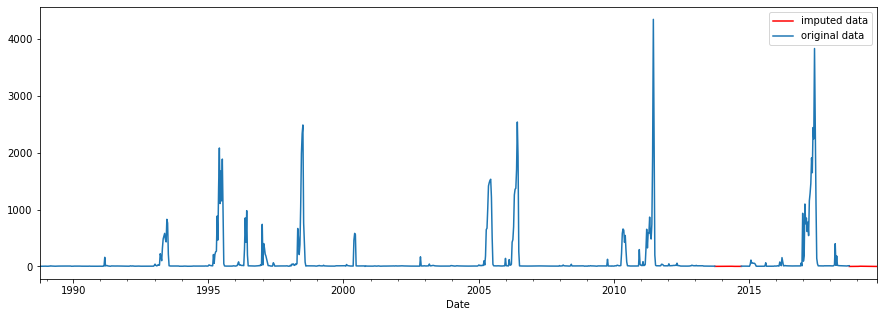

site no: 11237500


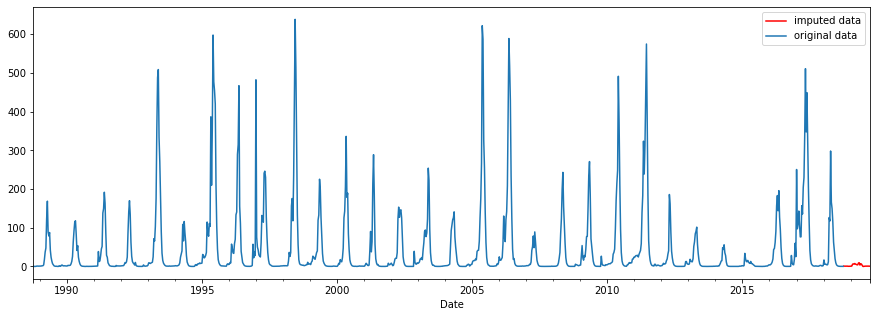

site no: 11238600


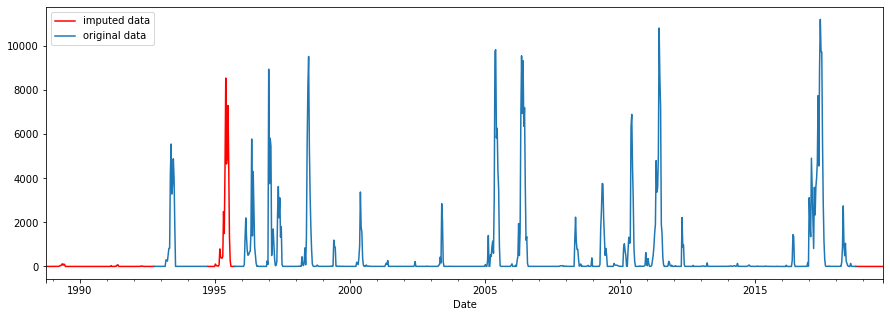

site no: 11244000


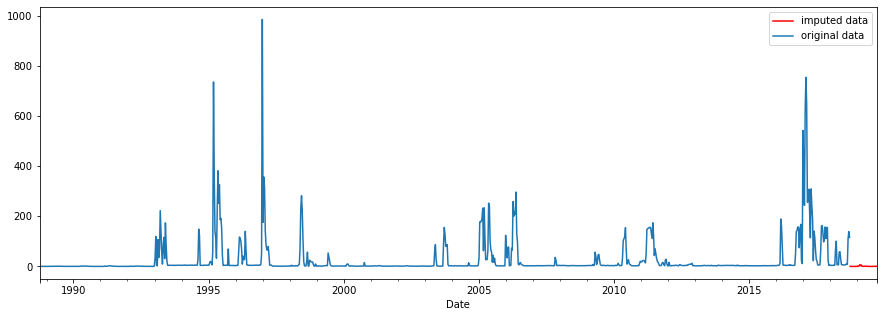

site no: 11246500


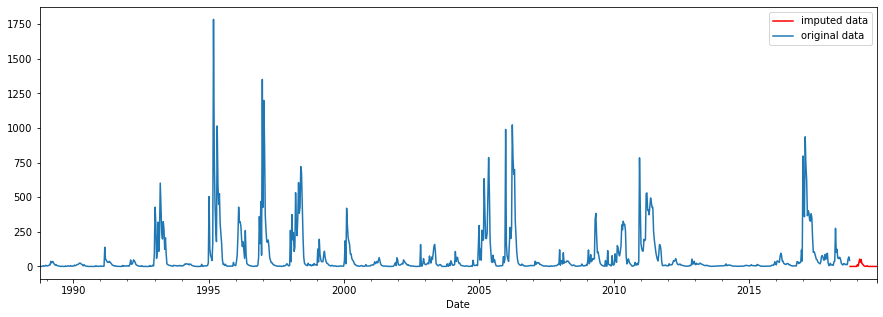

site no: 11278000


/Users/syeehyn/opt/anaconda3/envs/scipy-ml/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1167: UserWarning: Attempting to set identical left == right == 18163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


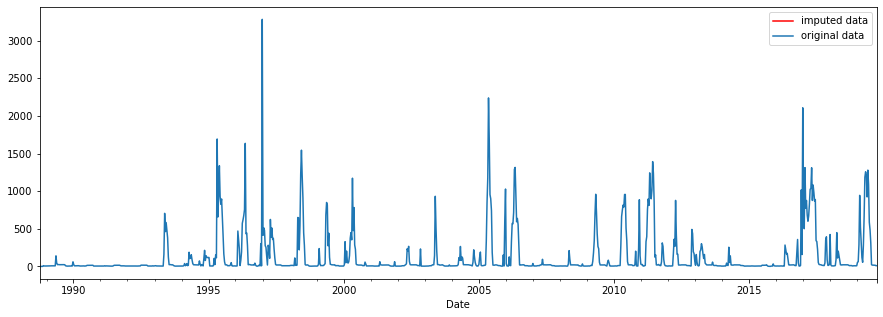

site no: 11298000


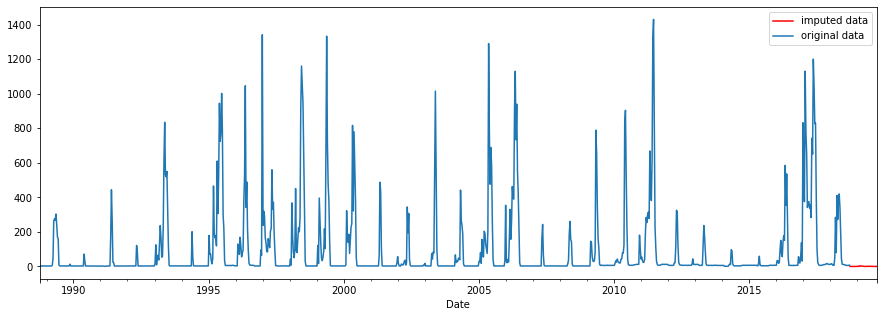

site no: 11299600


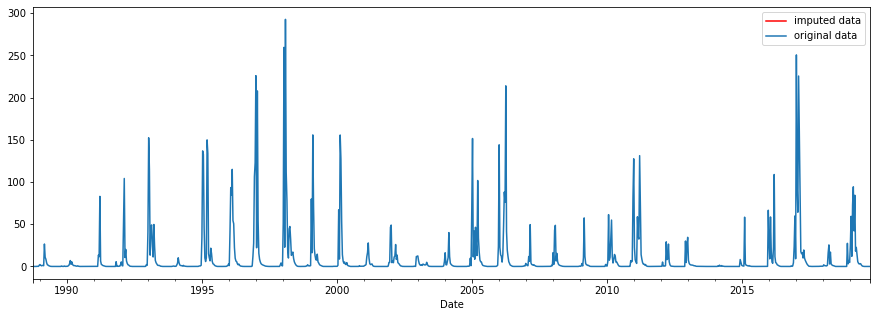

site no: 11315000


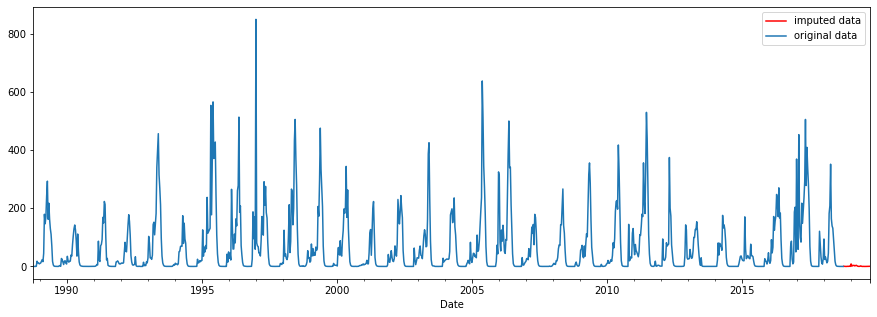

site no: 11316800


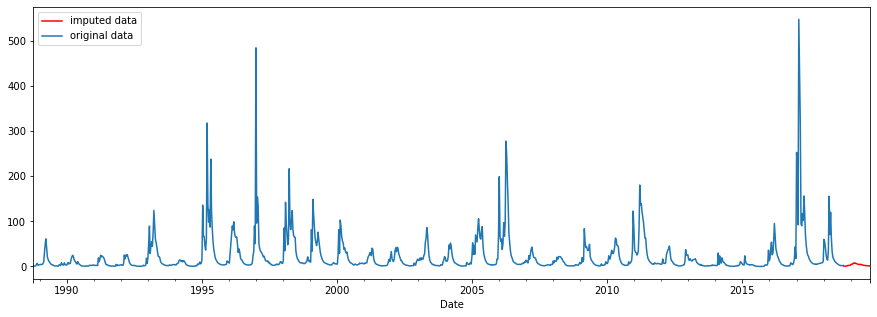

site no: 11396200


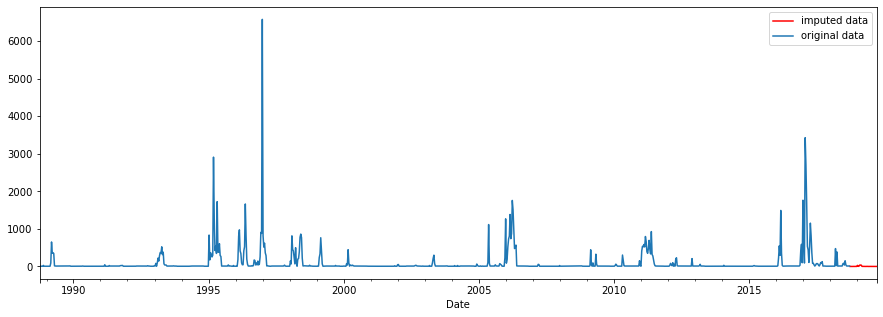

site no: 11416500


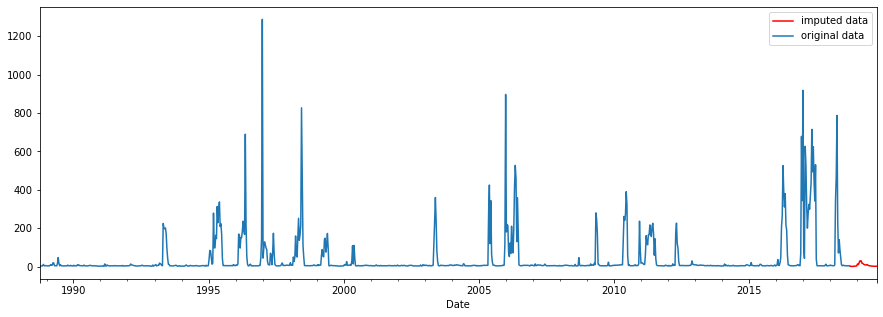

site no: 11427700


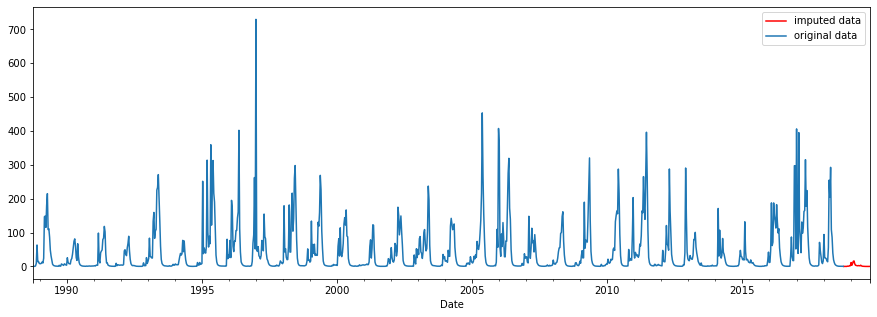

site no: 11427750


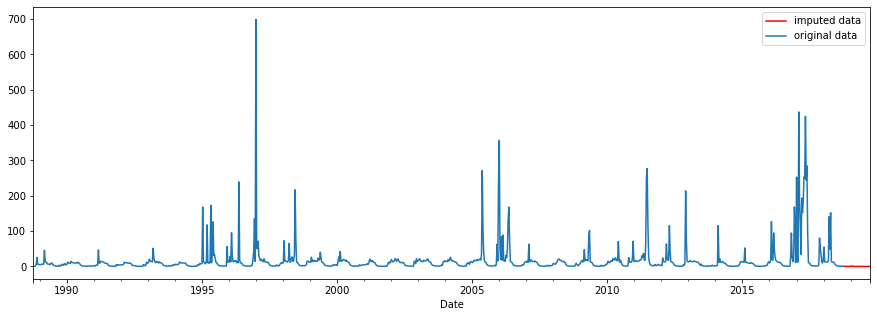

site no: 11436000


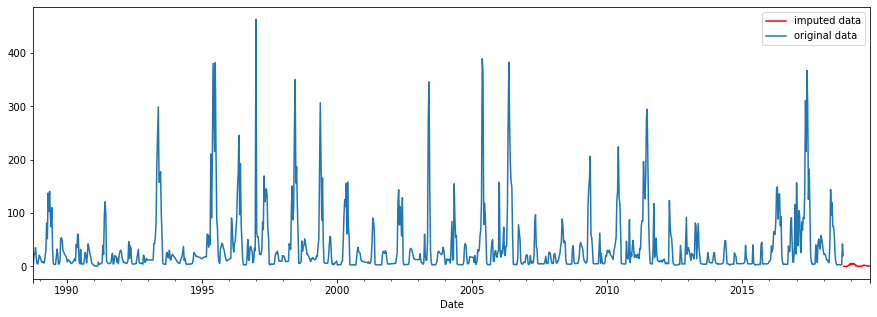

In [12]:
for s in filled_data.columns:
    missing_dates = df[s][df[s].isnull()].index
    tmp_df = filled_data[s].to_frame()
    tmp_df['missing'] =  df[s].isnull()
    tmp_df.index = pd.to_datetime(tmp_df.index)
    tmp_original = tmp_df[tmp_df.missing != True][s]
    tmp_imputed = tmp_df[tmp_df.missing == True][s]
    if len(tmp_imputed)!=0:
        print(f'site no: {s}')
        fig,ax = plt.subplots(1,1)
        tmp_imputed.resample('10d').mean().plot(style='-', c = 'r', label='imputed data', ax=ax)
        tmp_original.resample('10d').mean().plot(style='-', label='original data', ax=ax)
        plt.legend()
        plt.show()